In [1]:
from machinegnostics.models.regression import PolynomialRegressor, LinearRegressor
import numpy as np

import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

/Users/nirmal/Documents/np_research/ManGo_code/ManGo/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(
/Users/nirmal/Documents/np_research/ManGo_code/ManGo/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(
/Users/nirmal/Documents/np_research/ManGo_code/ManGo/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and 

Iteration: 1 - Machine Gnostic loss - hi : 8.2451, rentropy: 0.5999
Iteration: 2 - Machine Gnostic loss - hi : 8.245, rentropy: 0.5999
Convergence reached at iteration 2 with loss/rentropy change below tolerance.


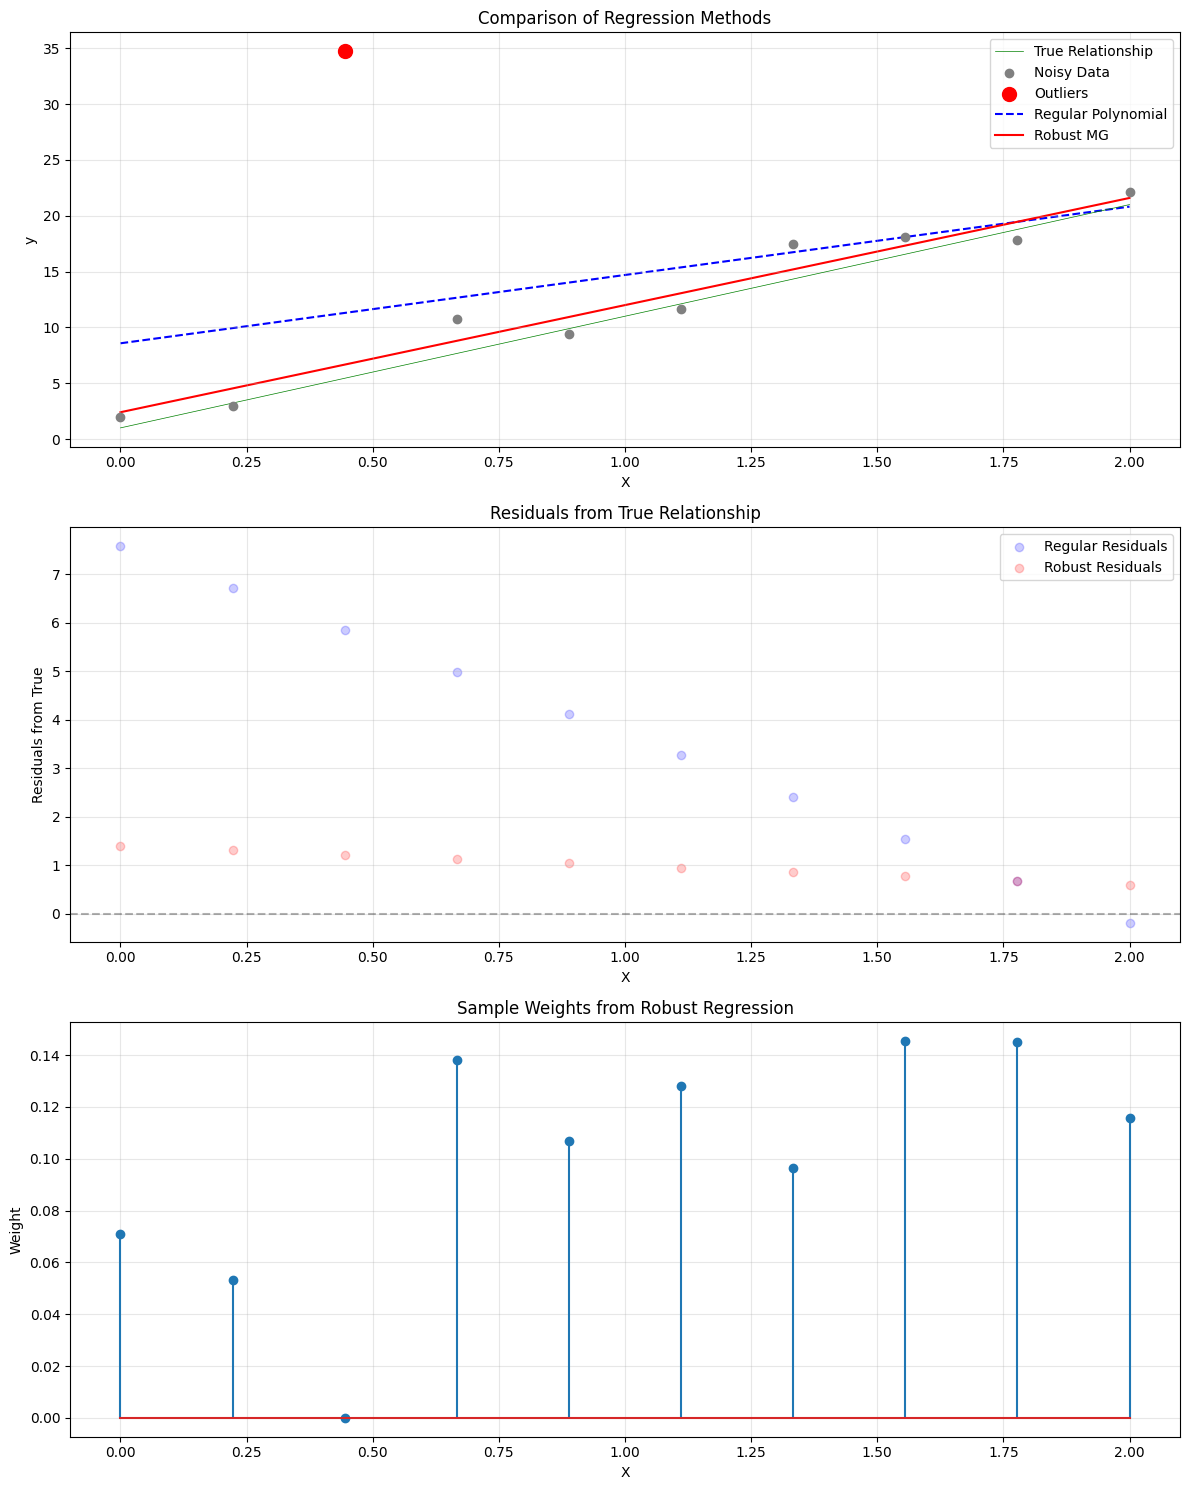

Coefficients:
True:     [1, 2]
Regular:  [0.         6.11971484]
Robust MG: [2.40285216 9.59521403]

MSE against true relationship (excluding outliers):
Regular Polynomial: 24.6826
Robust MG:         1.2263


In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate clean data
X = np.linspace(0, 2, 10).reshape(-1, 1)
y_clean = 10 * X.ravel() + 1  # True linear relationship

# Add controlled noise and outliers
noise = np.random.normal(0, 2, 10)
y_noisy = y_clean + noise
# y_noisy[2] += [8.0]  # Add outliers
y_noisy[2] = y_noisy[2] + 28.0 

# Create test points for smooth curve
X_test = np.linspace(0, 2, 100).reshape(-1, 1)

# Fit models
degree = 1  # Using degree 1 for linear relationship
# Regular polynomial regression
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X, y_noisy)
y_pred_regular = poly_reg.predict(X)
y_pred_regular_test = poly_reg.predict(X_test)

# Fit robust Machine Gnostics regression
mg_model = LinearRegressor(verbose=True, tol=1e-3,max_iter=1000)
# mg_model = RobustRegressor(degree=1)
mg_model.fit(X, y_noisy)
y_pred_robust = mg_model.predict(X)
y_pred_robust_test = mg_model.predict(X_test)

# Create figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Plot regression curves
ax1.plot(X, y_clean, 'g-', label='True Relationship', linewidth=0.5)
ax1.scatter(X, y_noisy, color='gray', label='Noisy Data', zorder=2)
ax1.scatter(X[2], y_noisy[2], color='red', s=100, label='Outliers', zorder=3)
ax1.plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
ax1.plot(X_test, y_pred_robust_test, 'r-', label='Robust MG', zorder=1)
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Comparison of Regression Methods')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot residuals from true relationship
residuals_regular = y_pred_regular - y_clean
residuals_robust = y_pred_robust - y_clean
ax2.scatter(X, residuals_regular, color='blue', label='Regular Residuals', alpha=0.2)
ax2.scatter(X, residuals_robust, color='red', label='Robust Residuals', alpha=0.2)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax2.set_xlabel('X')
ax2.set_ylabel('Residuals from True')
ax2.set_title('Residuals from True Relationship')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot sample weights
ax3.stem(X.ravel(), mg_model.weights, label='MG Weights')
ax3.set_xlabel('X')
ax3.set_ylabel('Weight')
ax3.set_title('Sample Weights from Robust Regression')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print performance metrics
print("Coefficients:")
print(f"True:     [1, 2]")
print(f"Regular:  {poly_reg.named_steps['linearregression'].coef_}")
print(f"Robust MG: {mg_model.coefficients}")

# Calculate MSE against true relationship
mse_regular = np.mean((y_pred_regular[:-2] - y_clean[:-2])**2)
mse_robust = np.mean((y_pred_robust[:-2] - y_clean[:-2])**2)
print("\nMSE against true relationship (excluding outliers):")
print(f"Regular Polynomial: {mse_regular:.4f}")
print(f"Robust MG:         {mse_robust:.4f}")

Iteration: 1 - Machine Gnostic loss - hi : 7.2016, rentropy: 0.7955
Iteration: 2 - Machine Gnostic loss - hi : 7.2016, rentropy: 0.7955
Convergence reached at iteration 2 with loss/rentropy change below tolerance.


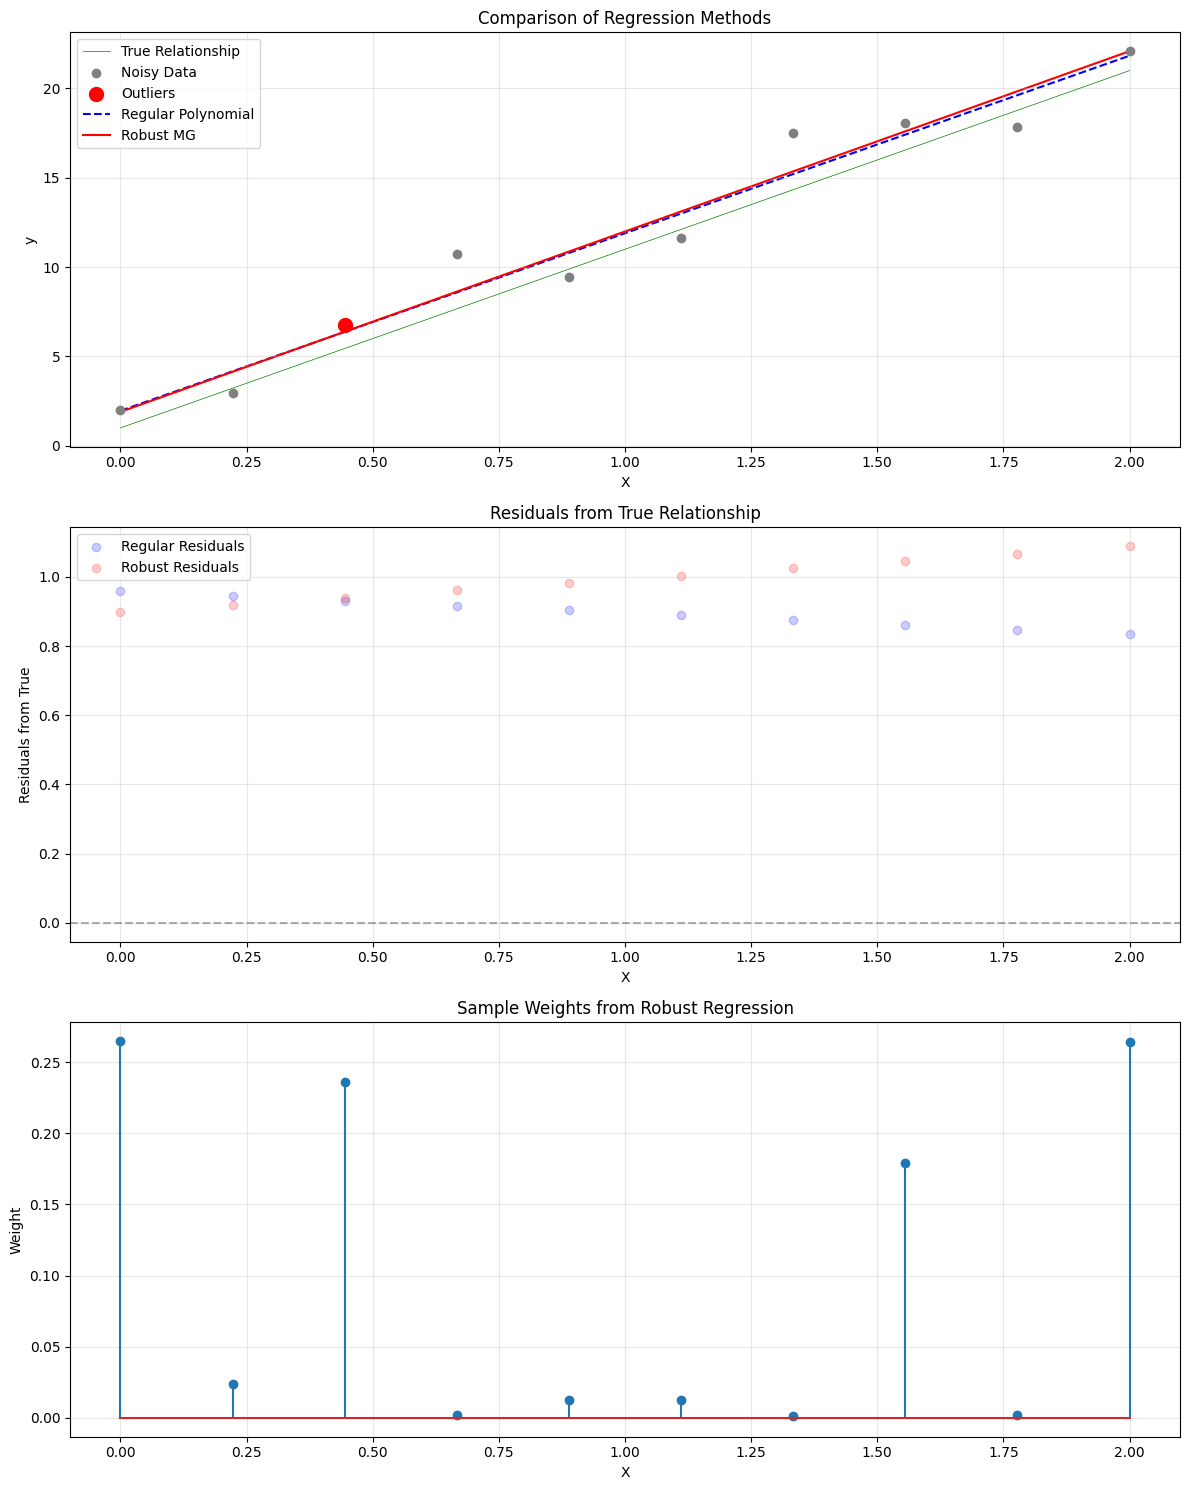

Coefficients:
True:     [1, 2]
Regular:  [0.         9.93789665]
Robust MG: [ 1.89728593 10.09578141]

MSE against true relationship (excluding outliers):
Regular Polynomial: 0.8290
Robust MG:         0.9467


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from machinegnostics.models.regression import PolynomialRegressor

# Set random seed for reproducibility
np.random.seed(42)

# Generate clean data
X = np.linspace(0, 2, 10).reshape(-1, 1)
y_clean = 10 * X.ravel() + 1  # True linear relationship

# Add controlled noise and outliers
noise = np.random.normal(0, 2, 10)
y_noisy = y_clean + noise
# y_noisy[2] = y_noisy[2] + 28.0 

# Convert to pandas DataFrame
X_df = pd.DataFrame(X, columns=['feature'])
y_noisy_df = pd.DataFrame(y_noisy, columns=['target'])

# Create test points for smooth curve
X_test = np.linspace(0, 2, 100).reshape(-1, 1)
X_test_df = pd.DataFrame(X_test, columns=['feature'])

# Fit models
degree = 1  # Using degree 1 for linear relationship
# Regular polynomial regression
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X_df, y_noisy_df.values.ravel())
y_pred_regular = poly_reg.predict(X_df)
y_pred_regular_test = poly_reg.predict(X_test_df)

# Fit robust Machine Gnostics regression
mg_model = PolynomialRegressor(verbose=True, tol=1e-3, degree=1, gnostic_characteristics=True, max_iter=100)
mg_model.fit(X_df, y_noisy_df.values.ravel())
y_pred_robust = mg_model.predict(X_df)
y_pred_robust_test = mg_model.predict(X_test_df)

# Create figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Plot regression curves
ax1.plot(X, y_clean, 'g-', label='True Relationship', linewidth=0.5)
ax1.scatter(X, y_noisy, color='gray', label='Noisy Data', zorder=2)
ax1.scatter(X[2], y_noisy[2], color='red', s=100, label='Outliers', zorder=3)
ax1.plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
ax1.plot(X_test, y_pred_robust_test, 'r-', label='Robust MG', zorder=1)
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Comparison of Regression Methods')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot residuals from true relationship
residuals_regular = y_pred_regular - y_clean
residuals_robust = y_pred_robust - y_clean
ax2.scatter(X, residuals_regular, color='blue', label='Regular Residuals', alpha=0.2)
ax2.scatter(X, residuals_robust, color='red', label='Robust Residuals', alpha=0.2)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax2.set_xlabel('X')
ax2.set_ylabel('Residuals from True')
ax2.set_title('Residuals from True Relationship')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot sample weights
ax3.stem(X.ravel(), mg_model.weights, label='MG Weights')
ax3.set_xlabel('X')
ax3.set_ylabel('Weight')
ax3.set_title('Sample Weights from Robust Regression')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print performance metrics
print("Coefficients:")
print(f"True:     [1, 2]")
print(f"Regular:  {poly_reg.named_steps['linearregression'].coef_}")
print(f"Robust MG: {mg_model.coefficients}")

# Calculate MSE against true relationship
mse_regular = np.mean((y_pred_regular[:-2] - y_clean[:-2])**2)
mse_robust = np.mean((y_pred_robust[:-2] - y_clean[:-2])**2)
print("\nMSE against true relationship (excluding outliers):")
print(f"Regular Polynomial: {mse_regular:.4f}")
print(f"Robust MG:         {mse_robust:.4f}")

In [4]:
score = mg_model.score(X_df, y_noisy_df.values.ravel())
print(f"\nR^2 Score of Robust MG: {score:.4f}")


R^2 Score of Robust MG: 0.9975


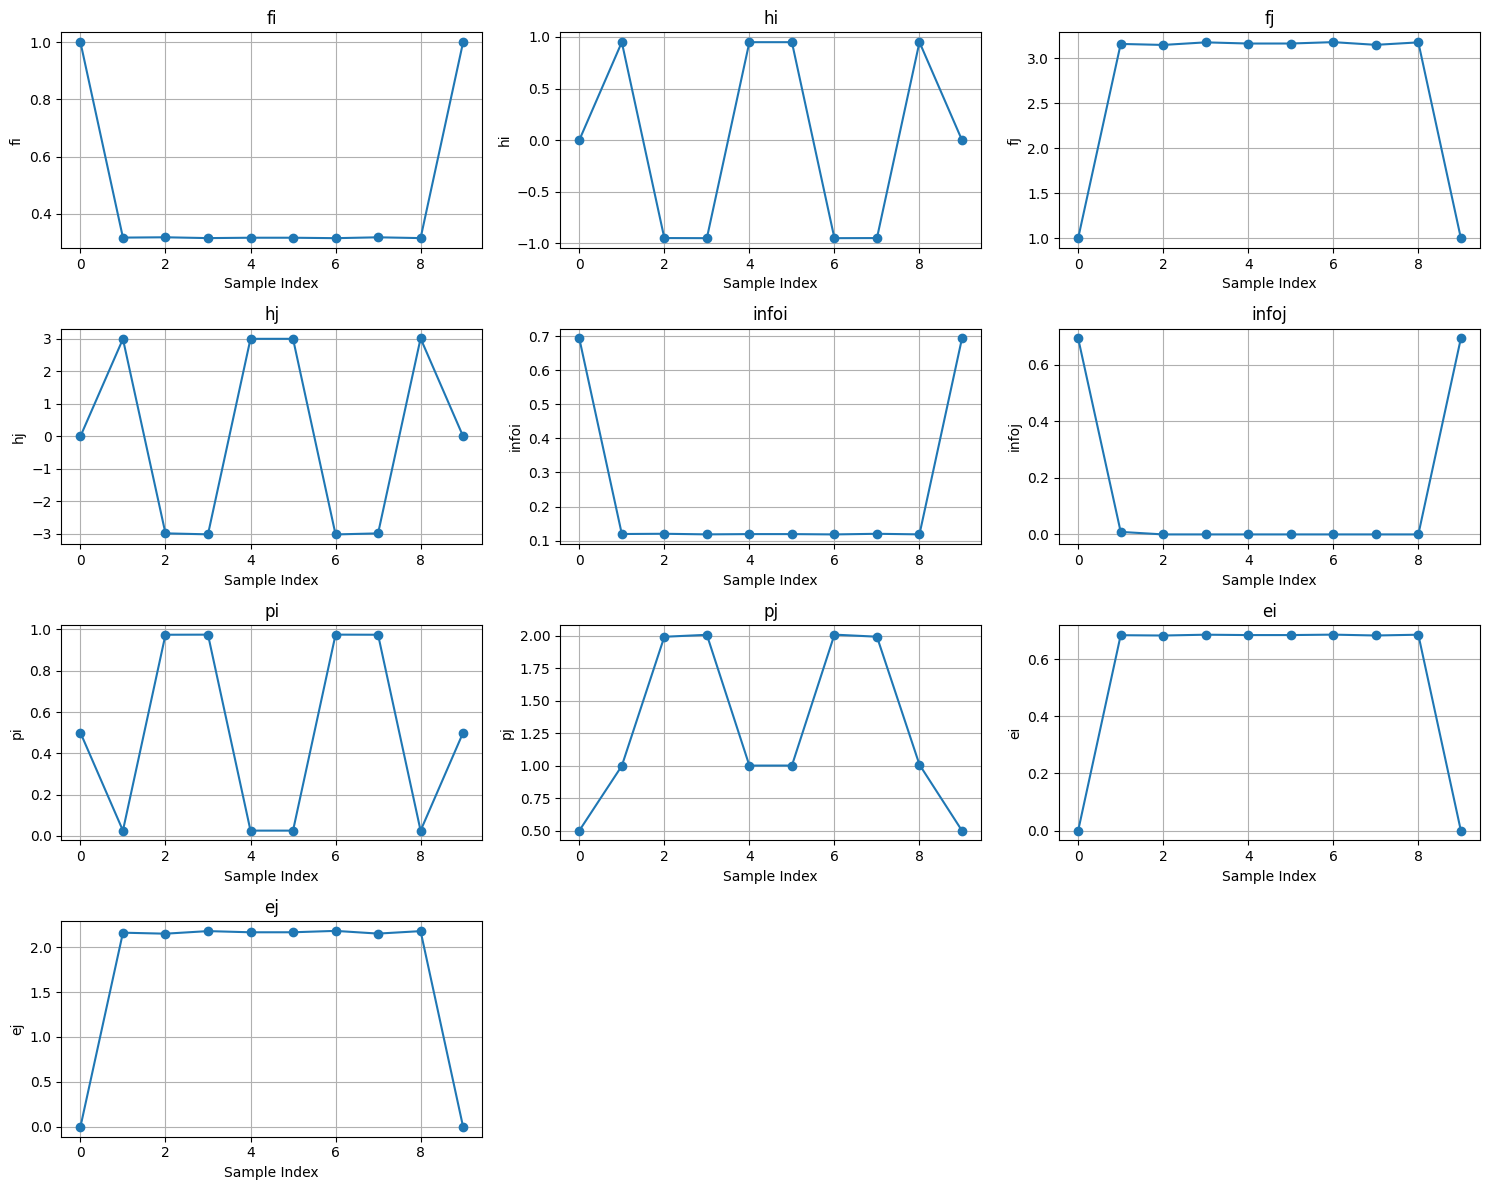

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Get the last parameter record (as a dict)
record = mg_model.params[-1]

# List of gnostic property keys to plot
gnostic_keys = ['fi', 'hi', 'fj', 'hj', 'infoi', 'infoj', 'pi', 'pj', 'ei', 'ej']

# Filter only those keys that exist and are array-like
plot_keys = [k for k in gnostic_keys if k in record and isinstance(record[k], (np.ndarray, list))]

n = len(plot_keys)
ncols = 3
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 3 * nrows))
axes = axes.flatten()

for i, key in enumerate(plot_keys):
    arr = np.array(record[key])
    axes[i].plot(arr, marker='o')
    axes[i].set_title(key)
    axes[i].set_xlabel('Sample Index')
    axes[i].set_ylabel(key)
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

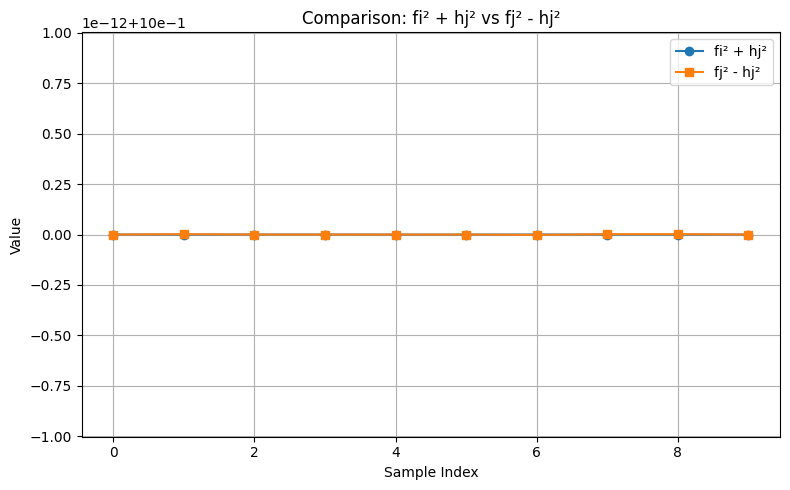

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Get the last parameter record
record = mg_model.params[-1]

# Extract arrays and compute the required quantities
fi = np.array(record['fi'])
fj = np.array(record['fj'])
hj = np.array(record['hj'])
hi = np.array(record['hi'])

fi2_plus_hj2 = fi**2 + hi**2
fj2_minus_hj2 = fj**2 - hj**2

plt.figure(figsize=(8, 5))
plt.plot(fi2_plus_hj2, 'o-', label='fi² + hj²')
plt.plot(fj2_minus_hj2, 's-', label='fj² - hj²')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison: fi² + hj² vs fj² - hj²')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Cosine Function:
MSE (excluding outliers):
Regular Polynomial: 375.9472
Ridge Regression:   393.6559
Lasso Regression:   374.0560
Robust MG:          259.4809

Exponential Function:
MSE (excluding outliers):
Regular Polynomial: 516.3775
Ridge Regression:   505.5366
Lasso Regression:   508.2516
Robust MG:          19.5804

Sigmoid Function:
MSE (excluding outliers):
Regular Polynomial: 518.3422
Ridge Regression:   489.9117
Lasso Regression:   513.7563
Robust MG:          72.0134

Polynomial Function:
MSE (excluding outliers):
Regular Polynomial: 550.7217
Ridge Regression:   469.4905
Lasso Regression:   545.9007
Robust MG:          67.0857


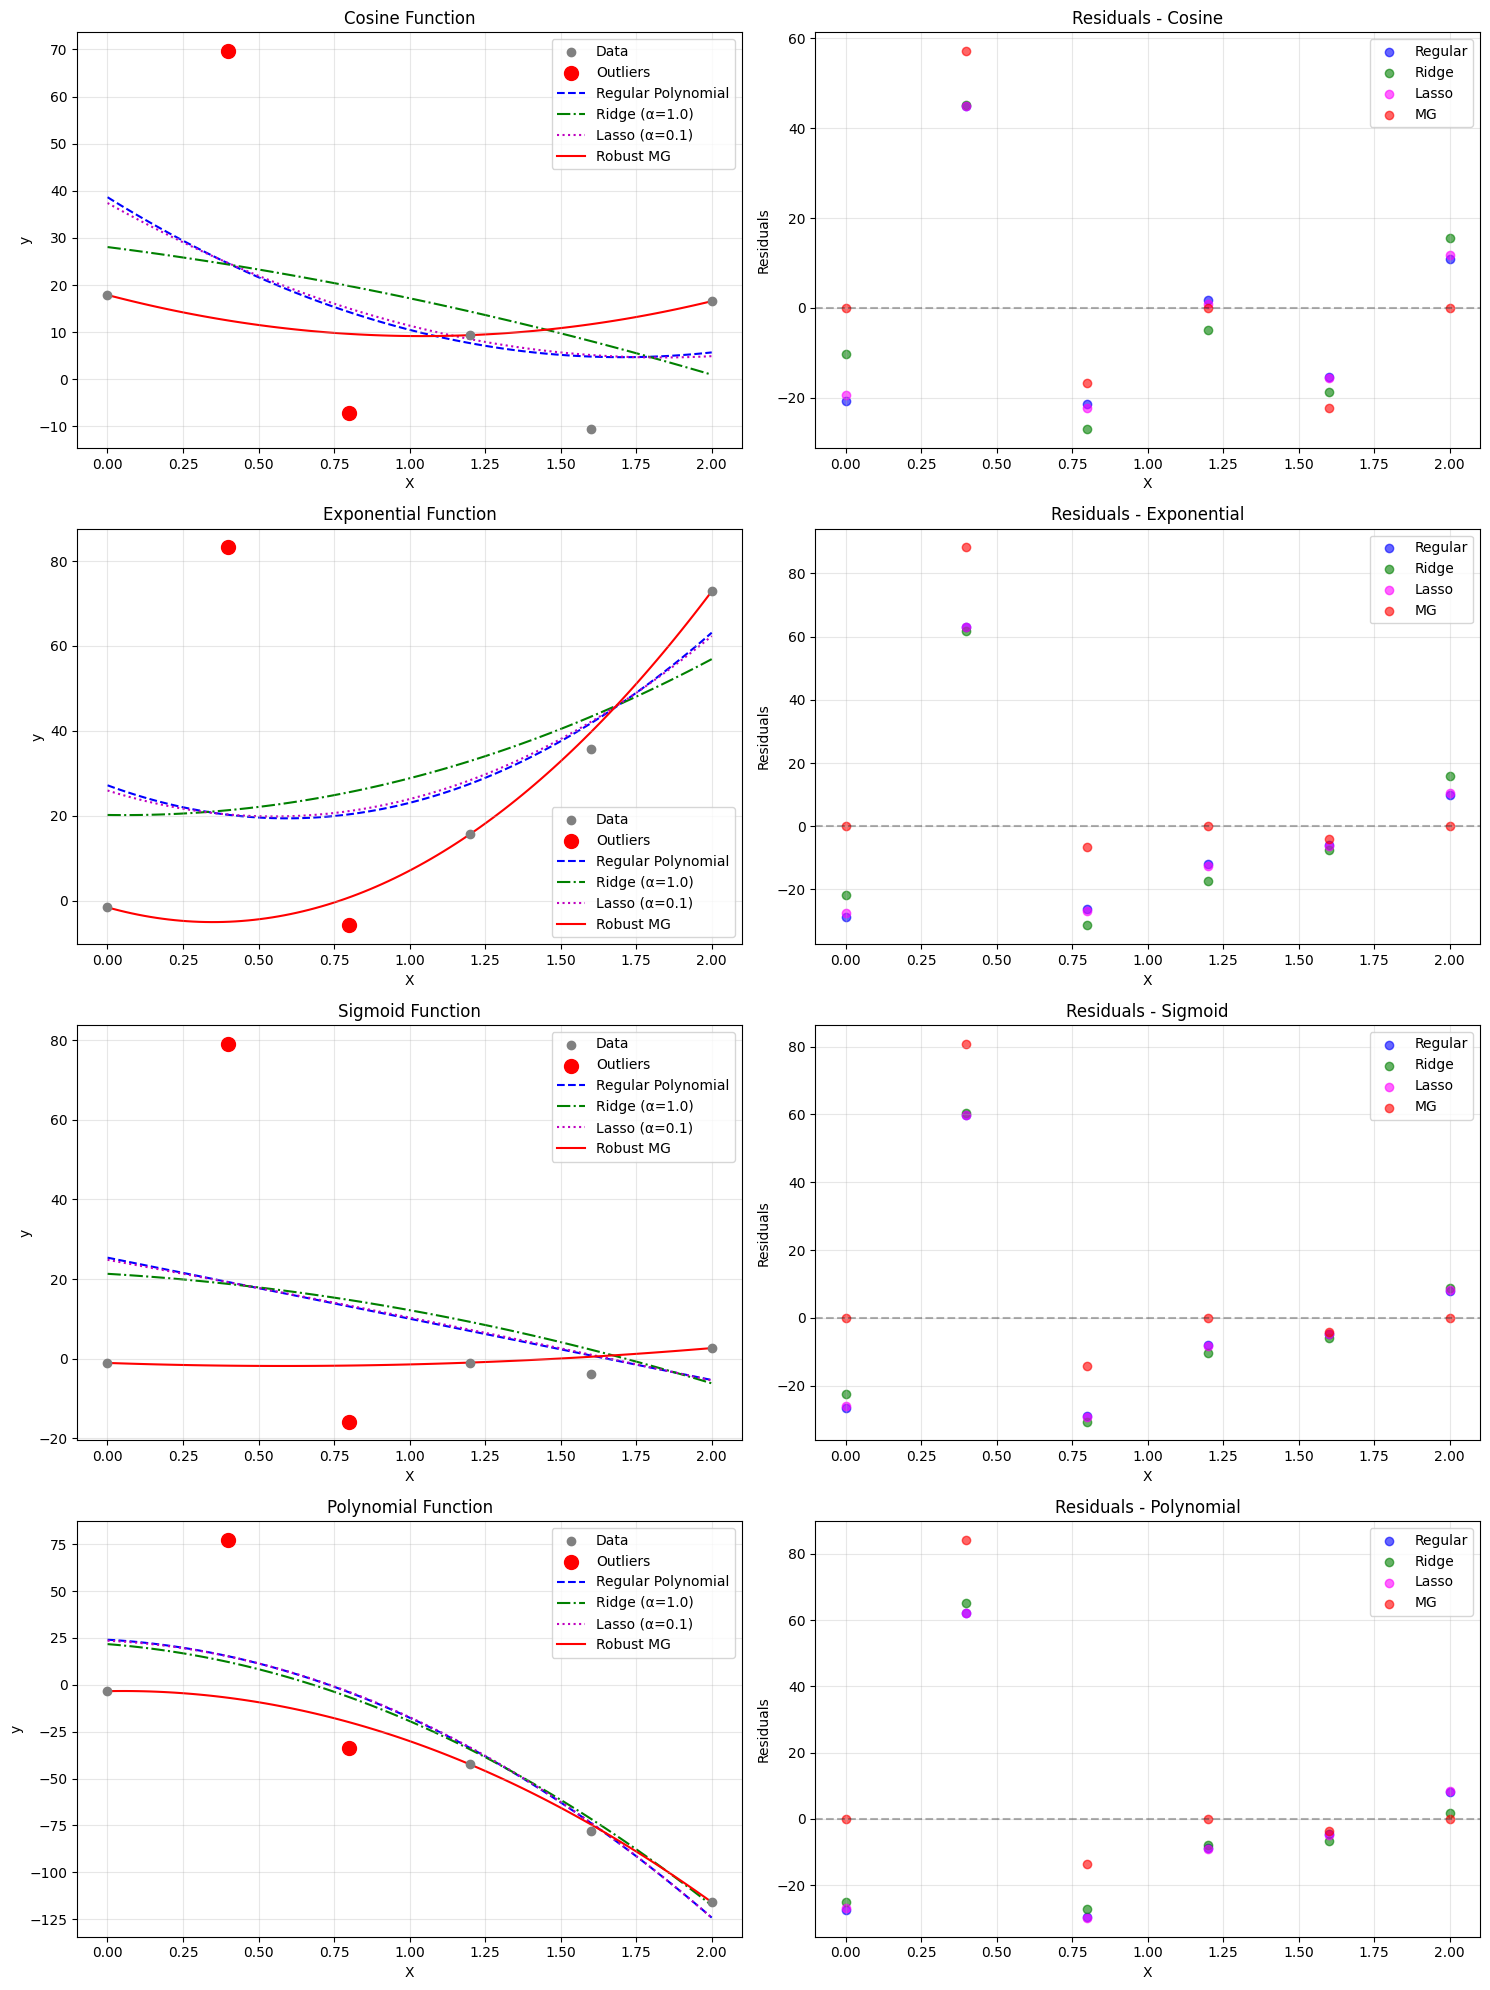

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Create multiple test functions
def generate_data(func_type, X, noise_level=1.8, outlier_positions=[1, 2], outlier_values=[80.0, -15.0]):
    if func_type == 'cosine':
        y = 15 * np.cos(2 * np.pi * X.ravel()) + 2
    elif func_type == 'exponential':
        y = 2.0 * np.exp(1.8 * X.ravel())
    elif func_type == 'sigmoid':
        y = 1.0 * (1 / (1 + np.exp(-5 * (X.ravel() - 1))))
    elif func_type == 'polynomial':
        y = 0.05 * X.ravel()**3 - 30 * X.ravel()**2 + 1
    
    y = y + np.random.normal(0, noise_level, len(X))
    y[outlier_positions] += outlier_values
    return y

# Test different functions
functions = ['cosine', 'exponential', 'sigmoid', 'polynomial']
fig, axes = plt.subplots(len(functions), 2, figsize=(15, 5*len(functions)))

# Set regularization parameters
alpha_ridge = 1.0
alpha_lasso = 0.1

for i, func in enumerate(functions):
    # Generate data - changed to 5 points
    X = np.linspace(0, 2, 6).reshape(-1, 1)  # 5 points total
    y = generate_data(func, X)
    X_test = np.linspace(0, 2, 100).reshape(-1, 1)
    
    # Convert to pandas DataFrame/Series
    X_pd = pd.DataFrame(X, columns=['X'])
    X_test_pd = pd.DataFrame(X_test, columns=['X'])
    y_pd = pd.Series(y, name='y')
    
    # Fit models
    degree = 2  # Reduced degree due to fewer points
    # Regular polynomial regression
    poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_reg.fit(X_pd, y_pd)
    y_pred_regular = poly_reg.predict(X_pd)
    y_pred_regular_test = poly_reg.predict(X_test_pd)
    
    # Ridge regression
    ridge_reg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha_ridge))
    ridge_reg.fit(X_pd, y_pd)
    y_pred_ridge = ridge_reg.predict(X_pd)
    y_pred_ridge_test = ridge_reg.predict(X_test_pd)
    
    # Lasso regression
    lasso_reg = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha_lasso))
    lasso_reg.fit(X_pd, y_pd)
    y_pred_lasso = lasso_reg.predict(X_pd)
    y_pred_lasso_test = lasso_reg.predict(X_test_pd)
    
    # Machine Gnostics regression
    mg_model = PolynomialRegressor(degree=degree)
    mg_model.fit(X_pd, y_pd)
    y_pred_robust = mg_model.predict(X_pd)
    y_pred_robust_test = mg_model.predict(X_test_pd)
    
    # Calculate residuals
    residuals_regular = y - y_pred_regular
    residuals_ridge = y - y_pred_ridge
    residuals_lasso = y - y_pred_lasso
    residuals_robust = y - y_pred_robust
    
    # Plot regression curves
    axes[i,0].scatter(X, y, color='gray', label='Data', zorder=2)
    # Highlight outliers
    axes[i,0].scatter(X[[1, 2]], y[[1, 2]], color='red', s=100, label='Outliers', zorder=3)

    axes[i,0].plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
    axes[i,0].plot(X_test, y_pred_ridge_test, 'g-.', label=f'Ridge (α={alpha_ridge})', zorder=1)
    axes[i,0].plot(X_test, y_pred_lasso_test, 'm:', label=f'Lasso (α={alpha_lasso})', zorder=1)
    axes[i,0].plot(X_test, y_pred_robust_test, 'r-', label='Robust MG', zorder=1)
    axes[i,0].set_xlabel('X')
    axes[i,0].set_ylabel('y')
    axes[i,0].set_title(f'{func.capitalize()} Function')
    axes[i,0].legend()
    axes[i,0].grid(True, alpha=0.3)
    
    # Plot residuals
    axes[i,1].scatter(X, residuals_regular, color='blue', label='Regular', alpha=0.6)
    axes[i,1].scatter(X, residuals_ridge, color='green', label='Ridge', alpha=0.6)
    axes[i,1].scatter(X, residuals_lasso, color='magenta', label='Lasso', alpha=0.6)
    axes[i,1].scatter(X, residuals_robust, color='red', label='MG', alpha=0.6)
    axes[i,1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
    axes[i,1].set_xlabel('X')
    axes[i,1].set_ylabel('Residuals')
    axes[i,1].set_title(f'Residuals - {func.capitalize()}')
    axes[i,1].legend()
    axes[i,1].grid(True, alpha=0.3)
    
    # Calculate metrics excluding outliers
    good_indices = [0, 2, 4]  # Indices of non-outlier points
    mse_regular = np.mean((y_pred_regular[good_indices] - y[good_indices])**2)
    mse_ridge = np.mean((y_pred_ridge[good_indices] - y[good_indices])**2)
    mse_lasso = np.mean((y_pred_lasso[good_indices] - y[good_indices])**2)
    mse_robust = np.mean((y_pred_robust[good_indices] - y[good_indices])**2)
    
    print(f"\n{func.capitalize()} Function:")
    print(f"MSE (excluding outliers):")
    print(f"Regular Polynomial: {mse_regular:.4f}")
    print(f"Ridge Regression:   {mse_ridge:.4f}")
    print(f"Lasso Regression:   {mse_lasso:.4f}")
    print(f"Robust MG:          {mse_robust:.4f}")

plt.tight_layout()
plt.show()

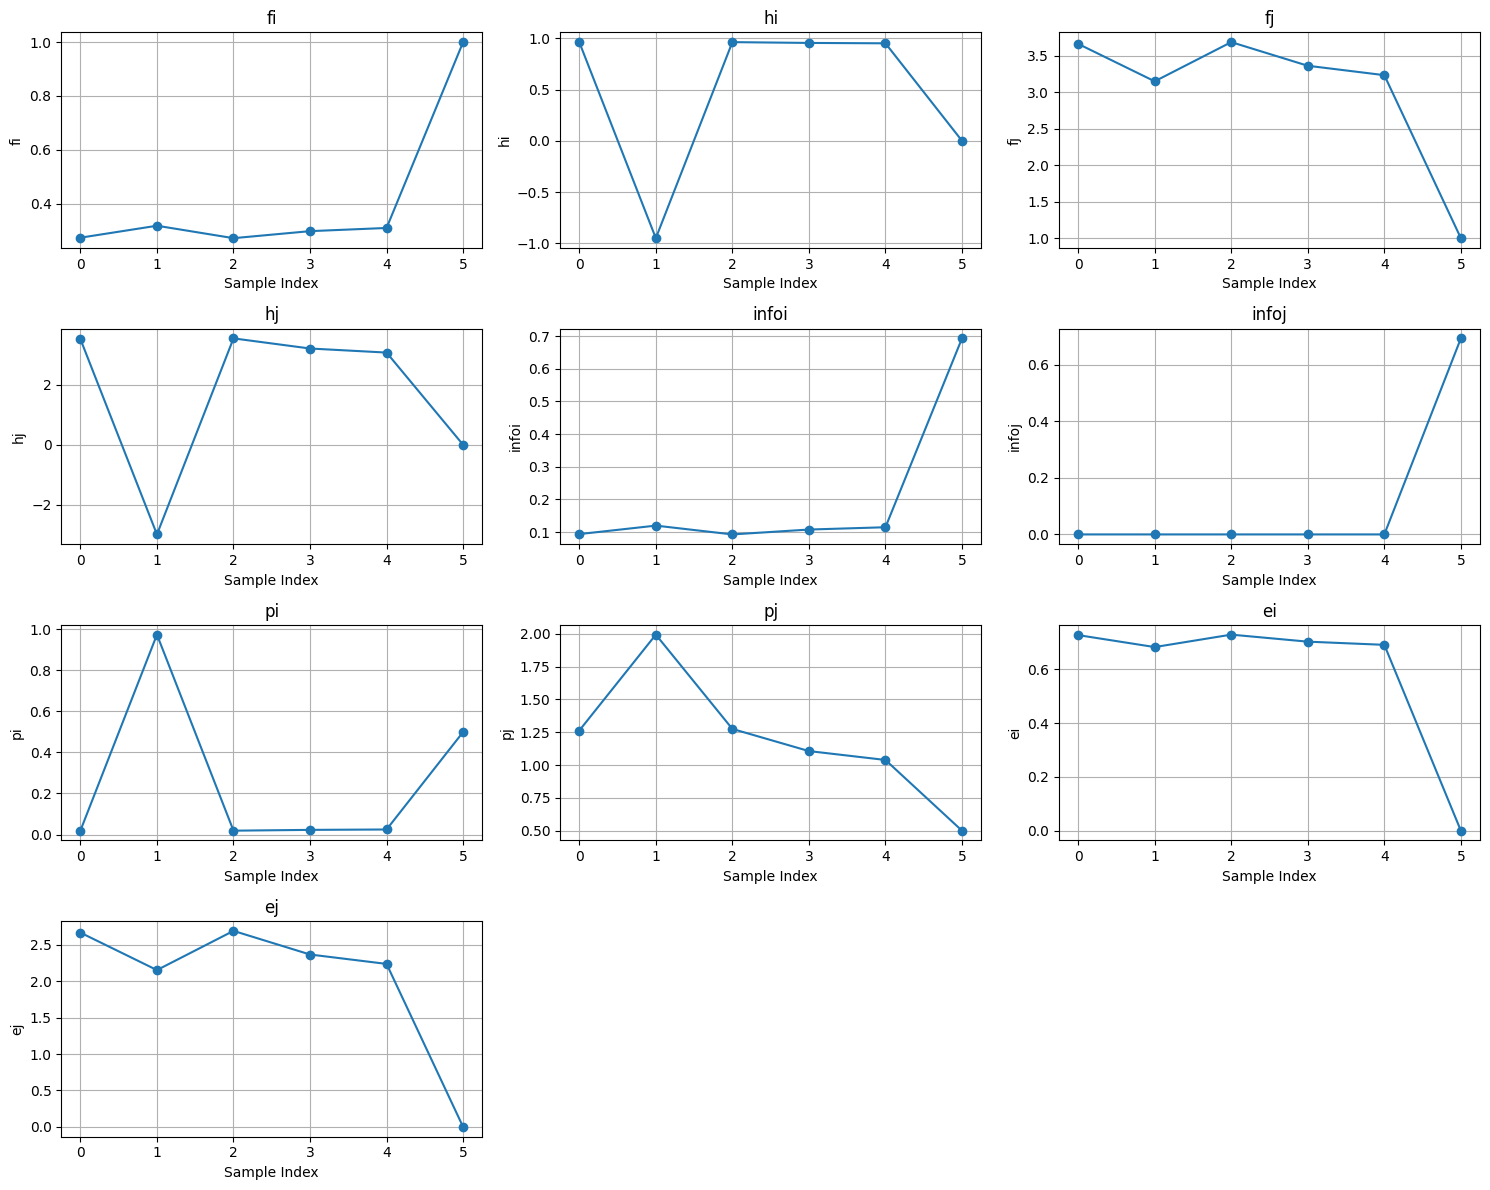

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Get the last parameter record (as a dict)
record = mg_model.params[-1]

# List of gnostic property keys to plot
gnostic_keys = ['fi', 'hi', 'fj', 'hj', 'infoi', 'infoj', 'pi', 'pj', 'ei', 'ej']

# Filter only those keys that exist and are array-like
plot_keys = [k for k in gnostic_keys if k in record and isinstance(record[k], (np.ndarray, list))]

n = len(plot_keys)
ncols = 3
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 3 * nrows))
axes = axes.flatten()

for i, key in enumerate(plot_keys):
    arr = np.array(record[key])
    axes[i].plot(arr, marker='o')
    axes[i].set_title(key)
    axes[i].set_xlabel('Sample Index')
    axes[i].set_ylabel(key)
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Iteration: 1 - Machine Gnostic loss - hi : 72.3061, rentropy: 0.3263
Iteration: 2 - Machine Gnostic loss - hi : 72.2397, rentropy: 0.2773
Iteration: 3 - Machine Gnostic loss - hi : 72.2416, rentropy: 0.2718
Iteration: 4 - Machine Gnostic loss - hi : 72.2427, rentropy: 0.2709
Iteration: 5 - Machine Gnostic loss - hi : 72.2432, rentropy: 0.2715
Iteration: 6 - Machine Gnostic loss - hi : 72.2433, rentropy: 0.2725
Convergence reached at iteration 6 with loss/rentropy change below tolerance.


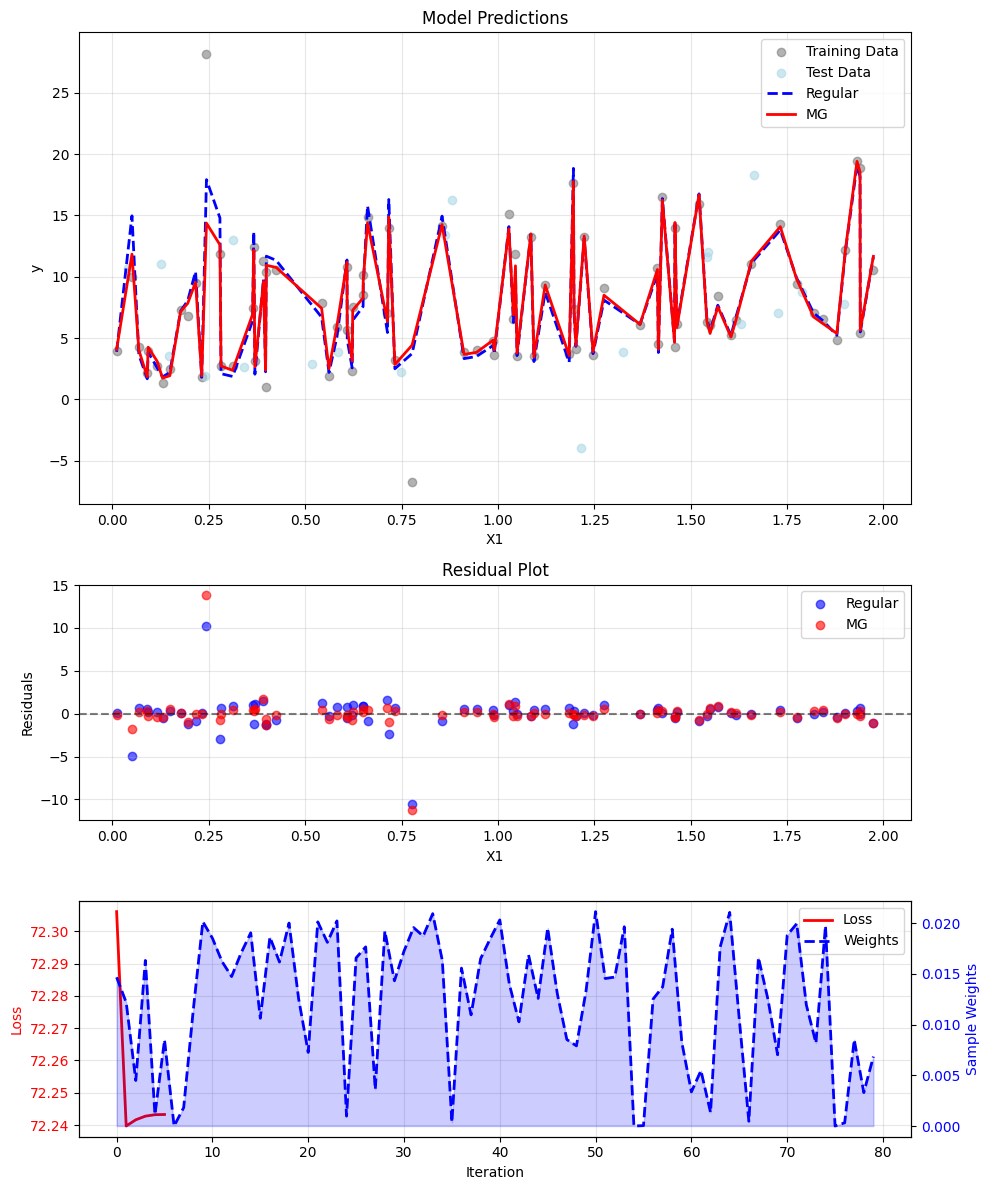


Performance Metrics:
--------------------------------------------------
Training Set:
MSE Regular:    3.6427
MSE MG:         4.2364

Test Set:
MSE Regular:    10.2418
MSE MG:         9.2580


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Generate 2D synthetic data
n_samples = 100
X1 = np.random.uniform(0, 2, n_samples)
X2 = np.random.uniform(0, 2, n_samples)
X = np.column_stack((X1, X2))

# True function: f(X1, X2) = 2*X1 + 3*X2^2 + X1*X2 + 1
y_clean = 2*X1 + 3*X2**2 + X1*X2 + 1

# Add noise
noise = np.random.normal(0, 0.5, n_samples)
y = y_clean + noise

# Add outliers
outlier_idx = [10, 30, 40, 60]
y[outlier_idx] += [8.0, -10.0, 15.0, -12.0]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit models
degree = 3
# Regular polynomial regression
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X_train, y_train)
y_pred_regular_train = poly_reg.predict(X_train)
y_pred_regular_test = poly_reg.predict(X_test)

# Fit robust Machine Gnostics regression
mg_model = PolynomialRegressor(degree=degree, verbose=True, early_stopping=True, tol=0.0001)
mg_model.fit(X_train, y_train)
y_pred_robust_train = mg_model.predict(X_train)
y_pred_robust_test = mg_model.predict(X_test)

# Create figure with subplots arranged vertically
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), height_ratios=[2, 1, 1])

# Plot 1: Regression Plot (using X1 as x-axis)
ax1.scatter(X_train[:, 0], y_train, c='gray', label='Training Data', alpha=0.6)
ax1.scatter(X_test[:, 0], y_test, c='lightblue', label='Test Data', alpha=0.6)
sort_idx = np.argsort(X_train[:, 0])
ax1.plot(X_train[sort_idx, 0], y_pred_regular_train[sort_idx], 'b--', 
         label='Regular', linewidth=2)
ax1.plot(X_train[sort_idx, 0], y_pred_robust_train[sort_idx], 'r-', 
         label='MG', linewidth=2)
ax1.set_xlabel('X1')
ax1.set_ylabel('y')
ax1.set_title('Model Predictions')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Residuals
residuals_regular = y_train - y_pred_regular_train
residuals_robust = y_train - y_pred_robust_train

ax2.scatter(X_train[:, 0], residuals_regular, c='blue', label='Regular', alpha=0.6)
ax2.scatter(X_train[:, 0], residuals_robust, c='red', label='MG', alpha=0.6)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax2.set_xlabel('X1')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')
ax2.legend()
ax2.grid(True, alpha=0.3)

history = mg_model._history

# Remove entries where values are None (usually the first entry)
history = [h for h in history if h['h_loss'] is not None]

iterations = [h['iteration'] for h in history]
h_loss = [h['h_loss'] for h in history]
# Plot 3: Loss History with Sample Weights
ax3.plot(h_loss, 'r-', label='Loss', linewidth=2)
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Loss', color='r')
ax3.tick_params(axis='y', labelcolor='r')
ax3.grid(True, alpha=0.3)

# Add sample weights on secondary y-axis
ax3_twin = ax3.twinx()
ax3_twin.plot(range(len(X_train)), mg_model.weights, 'b--', 
              label='Weights', linewidth=2)
ax3_twin.fill_between(range(len(X_train)), mg_model.weights, 
                      alpha=0.2, color='blue')
ax3_twin.set_ylabel('Sample Weights', color='b')
ax3_twin.tick_params(axis='y', labelcolor='b')

# Combine legends for loss plot
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

# Print performance metrics
print("\nPerformance Metrics:")
print("-" * 50)
print("Training Set:")
print(f"{'MSE Regular:':<15} {np.mean((y_pred_regular_train - y_train)**2):.4f}")
print(f"{'MSE MG:':<15} {np.mean((y_pred_robust_train - y_train)**2):.4f}")

print("\nTest Set:")
print(f"{'MSE Regular:':<15} {np.mean((y_pred_regular_test - y_test)**2):.4f}")
print(f"{'MSE MG:':<15} {np.mean((y_pred_robust_test - y_test)**2):.4f}")

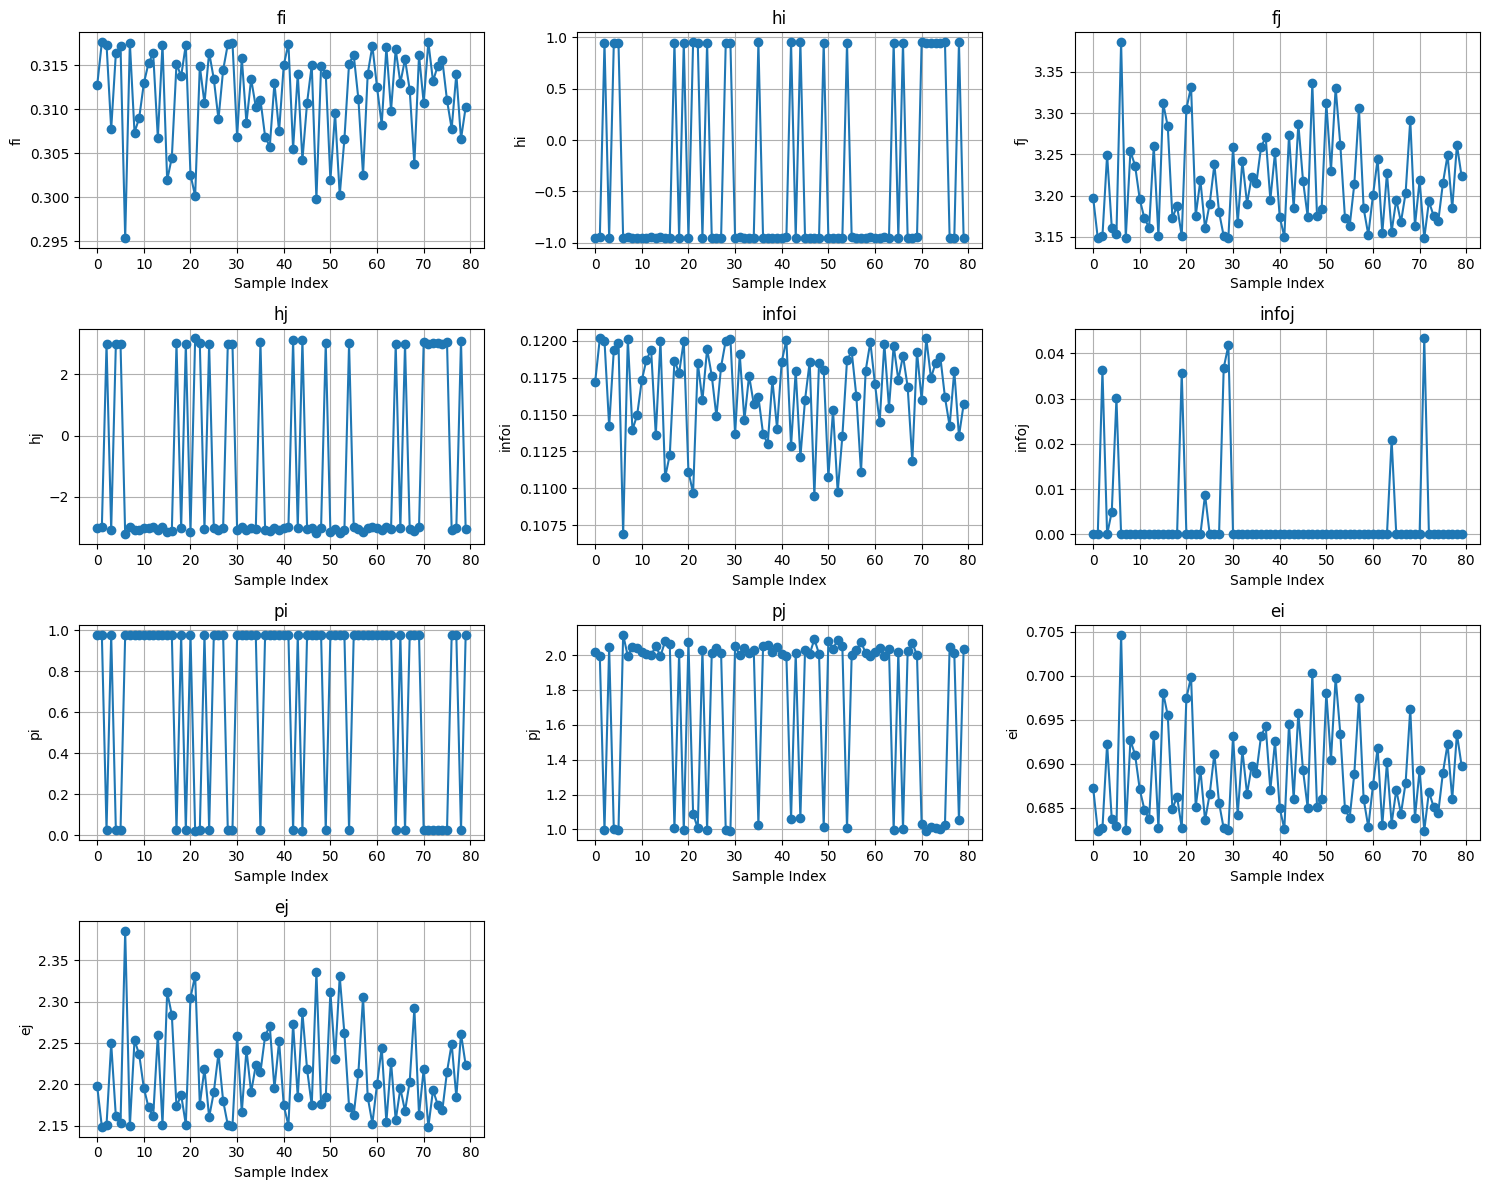

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Get the last parameter record (as a dict)
record = mg_model.params[-1]

# List of gnostic property keys to plot
gnostic_keys = ['fi', 'hi', 'fj', 'hj', 'infoi', 'infoj', 'pi', 'pj', 'ei', 'ej']

# Filter only those keys that exist and are array-like
plot_keys = [k for k in gnostic_keys if k in record and isinstance(record[k], (np.ndarray, list))]

n = len(plot_keys)
ncols = 3
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 3 * nrows))
axes = axes.flatten()

for i, key in enumerate(plot_keys):
    arr = np.array(record[key])
    axes[i].plot(arr, marker='o')
    axes[i].set_title(key)
    axes[i].set_xlabel('Sample Index')
    axes[i].set_ylabel(key)
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()